# MIMIC Features

This notebook is used to find the most common features and their names in the MIMIC3 database. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# for pretty printing table
pandas_table = pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [2]:
%%time
# load all rows in chartevents
df = pd.read_csv("../mimic/data_raw/CHARTEVENTS.csv.gz",
            usecols=["ITEMID", "CHARTTIME", "HADM_ID"],
            dtype={"ITEMID": int, "HADM_ID":int})

CPU times: user 3min 24s, sys: 7.5 s, total: 3min 32s
Wall time: 3min 32s


In [3]:
%%time
# get count of each itemid
counts = df["ITEMID"].value_counts().sort_values(ascending=False)

CPU times: user 1.37 s, sys: 105 ms, total: 1.48 s
Wall time: 1.48 s


In [4]:
# load all itemids and names
variables = pd.read_csv("../mimic/data_raw/D_ITEMS.csv.gz",
                        dtype={"ITEMID": int})

# map between itemid and name
ITEMID_map = variables[["LABEL", 'ITEMID']].set_index('ITEMID').to_dict()['LABEL']

In [5]:
# Get name of each index
count_df = pd.DataFrame(counts)
count_df.columns = ['count']
count_df = count_df.reset_index()
count_df['Name'] = count_df.apply(lambda x: ITEMID_map[x['index']], axis=1)

Note - low index numbers are from carevue, higher are from metavision

In [25]:
with pandas_table:
    display(count_df[:300])

,index,count,Name
0,211,5180809,Heart Rate
1,742,3464326,calprevflg
2,646,3418917,SpO2
3,618,3386719,Respiratory Rate
4,212,3303151,Heart Rhythm
5,161,3236350,Ectopy Type
6,128,3216866,Code Status
7,550,3205052,Precautions
8,1125,2955851,Service Type
9,220045,2762225,Heart Rate


Text(0.5, 0, 'Feature number')

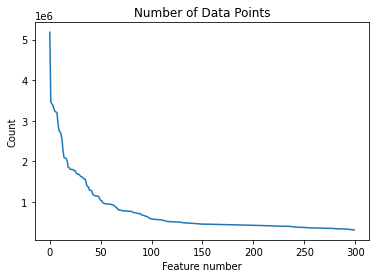

In [36]:
sns.lineplot(data=count_df[:300]['count'])
plt.title('Number of Data Points')
plt.ylabel('Count')
plt.xlabel('Feature number')

## See count after pivot (e.g. daily occurrence)

In [8]:
df.shape

(330712483, 3)

In [9]:
%%time
df["CHARTTIME"] = pd.to_datetime(df["CHARTTIME"], format="%Y-%m-%d %H:%M:%S")

CPU times: user 1min 3s, sys: 3.43 s, total: 1min 7s
Wall time: 1min 6s


In [10]:
%%time
df["CHARTDATE"] = df["CHARTTIME"].dt.date
del df["CHARTTIME"]

CPU times: user 1min 8s, sys: 3.15 s, total: 1min 11s
Wall time: 1min 11s


In [11]:
# add column with dummy value
df['test'] = 1

In [12]:
%%time
pivot = pd.pivot_table(df, index=["HADM_ID", "CHARTDATE"], columns="ITEMID",
            aggfunc="first", values="test", fill_value=np.nan)

CPU times: user 5min 31s, sys: 2min 42s, total: 8min 14s
Wall time: 8min 33s


In [13]:
new_counts = pivot.count().sort_values(ascending=False)

Text(0.5, 0, 'Feature number')

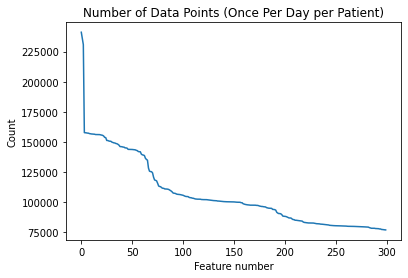

In [34]:
sns.lineplot(data=new_counts.reset_index()[0][:300])
plt.title('Number of Data Points (Once Per Day per Patient)')
plt.ylabel('Count')
plt.xlabel('Feature number')

In [15]:
# Get name of each index
new_count_df = pd.DataFrame(new_counts)
new_count_df.columns = ['count']
new_count_df = new_count_df.reset_index()
new_count_df['Name'] = new_count_df.apply(lambda x: ITEMID_map[x['ITEMID']], axis=1)

In [26]:
with pandas_table:
    display(new_count_df[:300])

,ITEMID,count,Name
0,211,241092,Heart Rate
1,31,236115,Activity
2,80,230807,Bowel Sounds
3,212,157814,Heart Rhythm
4,742,157746,calprevflg
5,161,157608,Ectopy Type
6,618,157423,Respiratory Rate
7,646,157363,SpO2
8,432,157020,Level of Conscious
9,617,156824,Respiratory Pattern


## See how many days have no missing data

Text(0.5, 0, 'Number of must common features required')

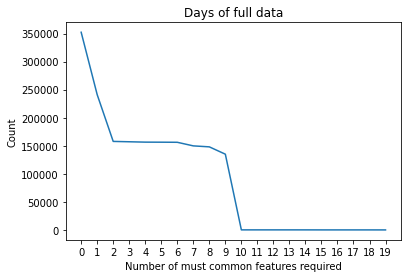

In [70]:
x = range(20)
y = [len(pivot[counts.index[:x]].dropna()) for x in range(20)]
sns.lineplot(x=x, y=y)
plt.title('Days of full data')
plt.ylabel('Count')
plt.xticks(x)
plt.xlabel('Number of must common features required')

In [67]:
list(zip(x,y))

[(0, 352325),
 (1, 241092),
 (2, 157744),
 (3, 157118),
 (4, 156457),
 (5, 156350),
 (6, 156189),
 (7, 149791),
 (8, 148039),
 (9, 134987),
 (10, 91),
 (11, 88),
 (12, 87),
 (13, 86),
 (14, 72),
 (15, 34),
 (16, 34),
 (17, 34),
 (18, 25),
 (19, 0)]